In [2]:
import numpy as np
from scipy import stats

In [3]:
#Test
rng = np.random.default_rng()
sample1 = stats.uniform.rvs(size=100, random_state=rng)
sample2 = stats.norm.rvs(size=110, random_state=rng)
stats.ks_2samp(sample1, sample2)

KstestResult(statistic=np.float64(0.4727272727272727), pvalue=np.float64(3.9454606129597475e-11), statistic_location=np.float64(-0.04580195814726005), statistic_sign=np.int8(-1))

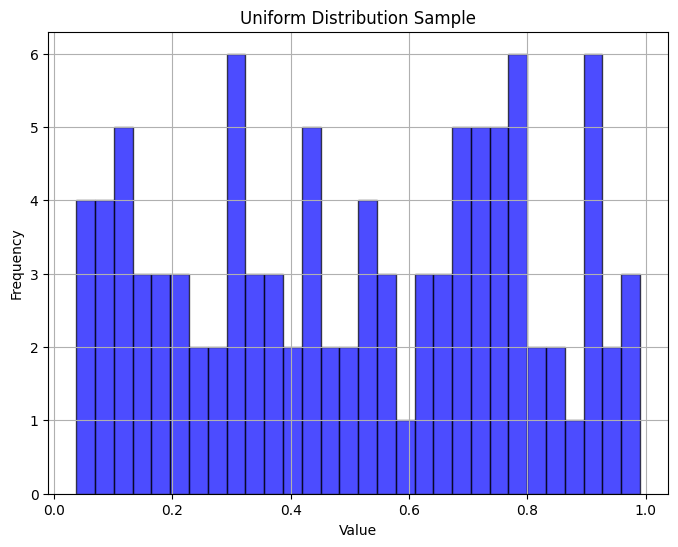

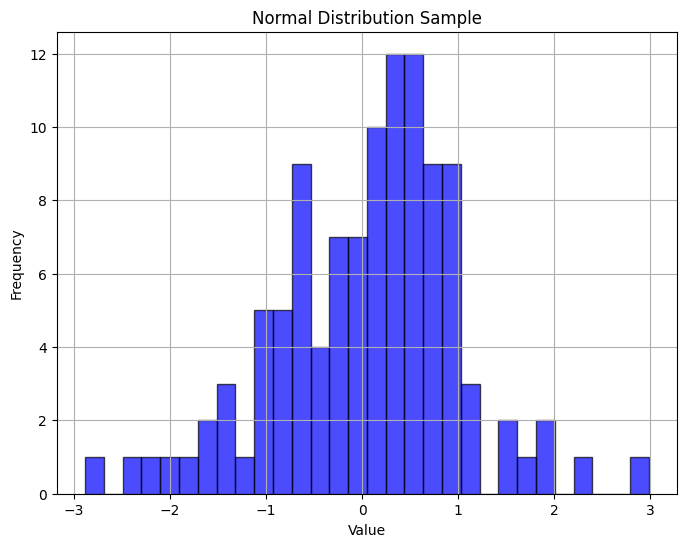

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_sample_distribution(sample, title='Sample Distribution', bins=30):
    """
    Plots the distribution of a given sample.

    Parameters:
    - sample: array_like
      The sample data to be plotted.
    - title: str, optional
      The title of the plot. Default is 'Sample Distribution'.
    - bins: int, optional
      The number of bins to use in the histogram. Default is 30.
    """
    plt.figure(figsize=(8, 6))
    plt.hist(sample, bins=bins, alpha=0.7, color='blue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Example usage
rng = np.random.default_rng()
sample1 = stats.uniform.rvs(size=100, random_state=rng)
sample2 = stats.norm.rvs(size=110, random_state=rng)

plot_sample_distribution(sample1, title='Uniform Distribution Sample')
plot_sample_distribution(sample2, title='Normal Distribution Sample')

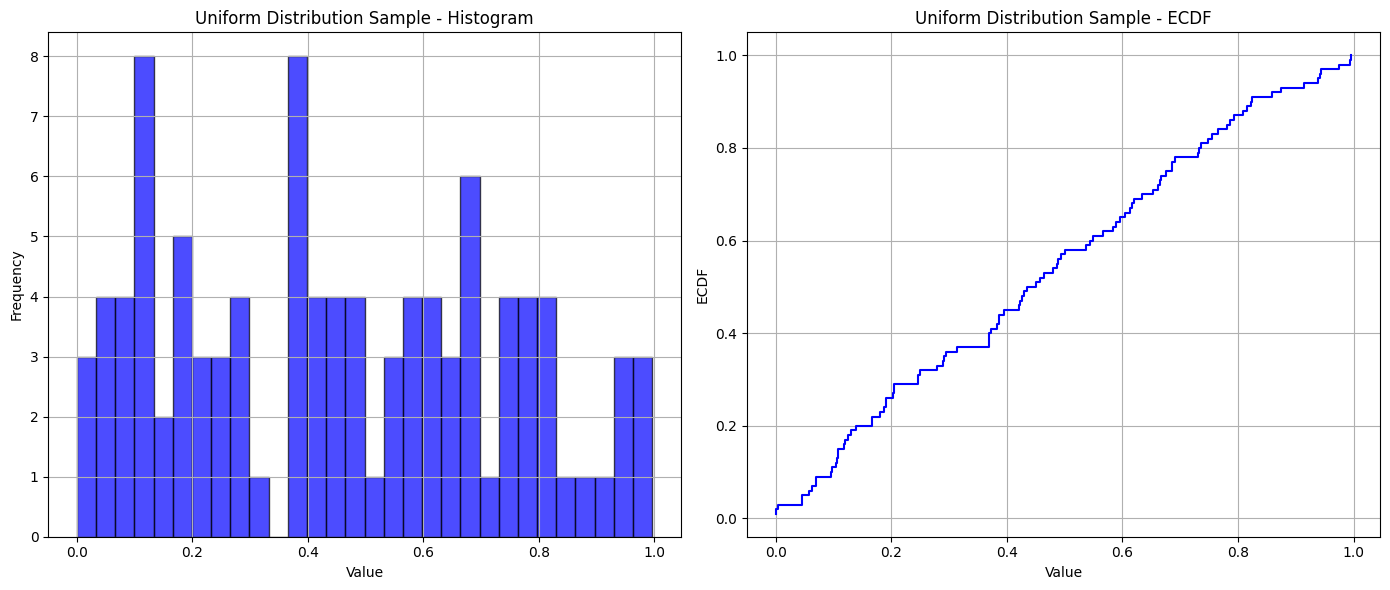

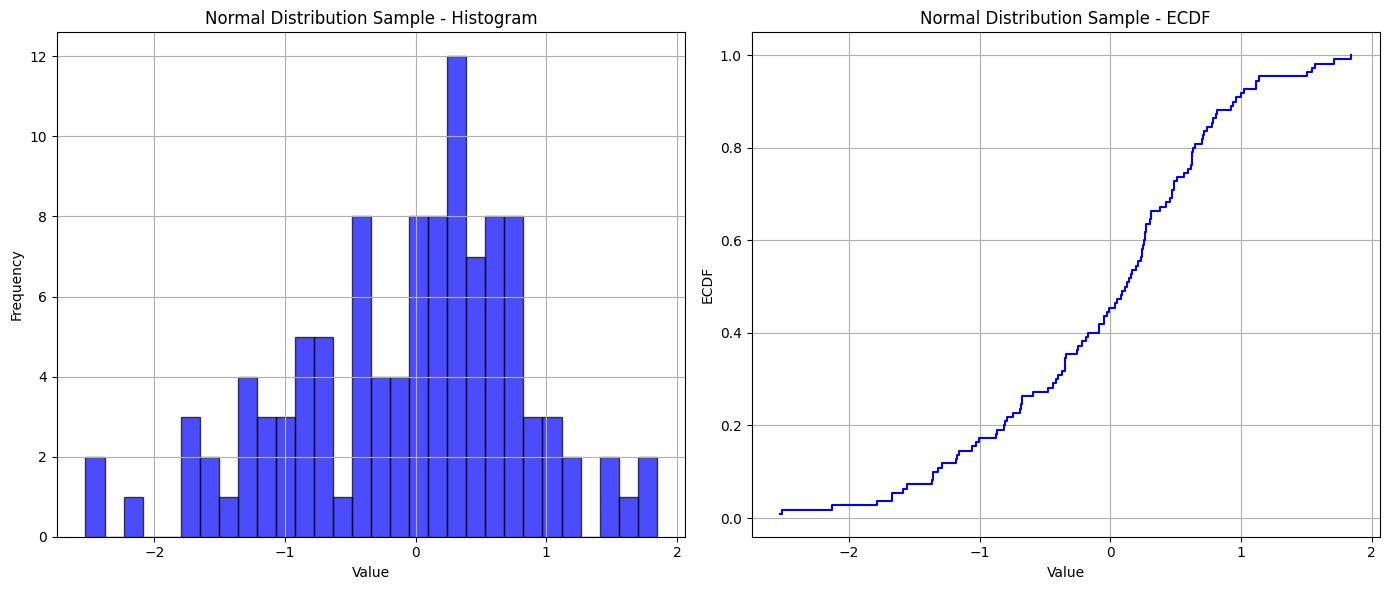

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_sample_distribution_and_ecdf(sample, title='Sample Distribution', bins=30):
    """
    Plots the distribution and ECDF of a given sample.

    Parameters:
    - sample: array_like
      The sample data to be plotted.
    - title: str, optional
      The title of the plot. Default is 'Sample Distribution'.
    - bins: int, optional
      The number of bins to use in the histogram. Default is 30.
    """
    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Plot the histogram
    ax[0].hist(sample, bins=bins, alpha=0.7, color='blue', edgecolor='black')
    ax[0].set_title(f'{title} - Histogram')
    ax[0].set_xlabel('Value')
    ax[0].set_ylabel('Frequency')
    ax[0].grid(True)

    # Calculate the ECDF
    sorted_sample = np.sort(sample)
    ecdf = np.arange(1, len(sorted_sample) + 1) / len(sorted_sample)

    # Plot the ECDF
    ax[1].step(sorted_sample, ecdf, where='post', color='blue')
    ax[1].set_title(f'{title} - ECDF')
    ax[1].set_xlabel('Value')
    ax[1].set_ylabel('ECDF')
    ax[1].grid(True)

    # Show the plots
    plt.tight_layout()
    plt.show()

# Example usage
rng = np.random.default_rng()
sample1 = stats.uniform.rvs(size=100, random_state=rng)
sample2 = stats.norm.rvs(size=110, random_state=rng)

# Plot the distributions and ECDFs of the samples
plot_sample_distribution_and_ecdf(sample1, title='Uniform Distribution Sample')
plot_sample_distribution_and_ecdf(sample2, title='Normal Distribution Sample')

In [18]:
import numpy as np
from scipy import stats

def pretty_print_ks_result(result):
    """
    Prints the KstestResult in a readable format.

    Parameters:
    - result: The result object from a KS test containing the statistic, p-value, statistic_location, and statistic_sign.
    """
    print("Kolmogorov-Smirnov Test Result:")
    print(f"  Statistic: {result.statistic:.6f}")
    print(f"  P-value: {result.pvalue:.6e}")
    print(f"  Statistic Location: {result.statistic_location:.6f}")
    print(f"  Statistic Sign: {'Positive' if result.statistic_sign == 1 else 'Negative'}")

# Example usage
rng = np.random.default_rng()
sample1 = stats.uniform.rvs(size=100, random_state=rng)
sample2 = stats.norm.rvs(size=110, random_state=rng)

# Perform the KS test
result = stats.ks_2samp(sample1, sample2)

# Print the result
pretty_print_ks_result(result)

Kolmogorov-Smirnov Test Result:
  Statistic: 0.536364
  P-value: 2.342355e-14
  Statistic Location: -0.009111
  Statistic Sign: Negative


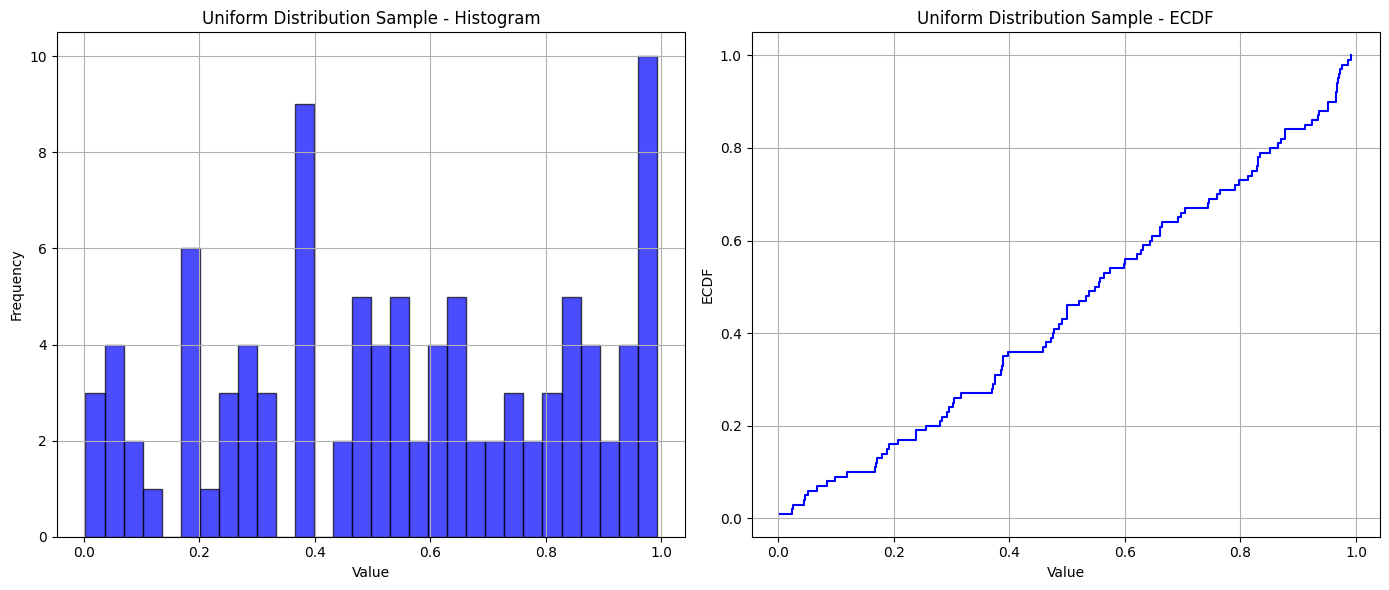

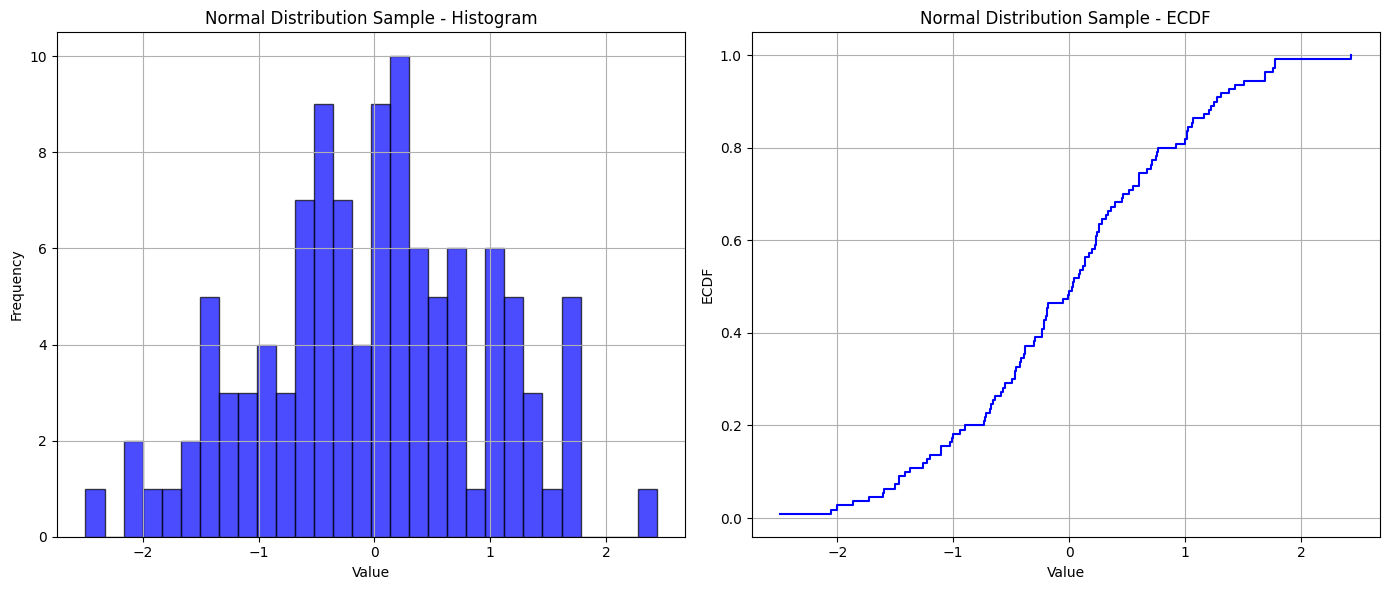

Kolmogorov-Smirnov Test Result:
  Statistic: 0.490909
  P-value: 5.299121e-12
  Statistic Location: 0.001397
  Statistic Sign: Negative
Kolmogorov-Smirnov Test Result:
  Statistic: 0.490909
  P-value: 5.299121e-12
  Statistic Location: 0.001397
  Statistic Sign: Negative


In [22]:
import numpy as np
from scipy import stats

def perform_ks_2samp(data1, data2, alternative='two-sided', method='auto', axis=0, nan_policy='omit', keepdims=False):
    """
    Perform the two-sample Kolmogorov-Smirnov test with adjustable parameters.

    Parameters:
    - data1, data2: array_like, 1-Dimensional
      Two arrays of sample observations assumed to be drawn from a continuous distribution. Sample sizes can be different.
    - alternative: {'two-sided', 'less', 'greater'}, optional
      Defines the null and alternative hypotheses. Default is 'two-sided'.
    - method: {'auto', 'exact', 'asymp'}, optional
      Defines the method used for calculating the p-value. Default is 'auto'.
    - axis: int or None, optional
      Axis along which to compute the statistic. Default is 0.
    - nan_policy: {'propagate', 'omit', 'raise'}, optional
      Defines how to handle input NaNs. Default is 'propagate'.
    - keepdims: bool, optional
      If True, the axes which are reduced are left in the result as dimensions with size one. Default is False.

    Returns:
    - KstestResult: An object containing attributes like statistic, pvalue, statistic_location, and statistic_sign.
    """
    # Perform the KS test
    result = stats.ks_2samp(data1, data2, alternative=alternative, method=method, axis=axis, nan_policy=nan_policy, keepdims=keepdims)
    return result

# Example usage
rng = np.random.default_rng()
sample1 = stats.uniform.rvs(size=100, random_state=rng)
sample2 = stats.norm.rvs(size=110, random_state=rng)
plot_sample_distribution_and_ecdf(sample1, title='Uniform Distribution Sample')
plot_sample_distribution_and_ecdf(sample2, title='Normal Distribution Sample')

# Call the function with default parameters
result = perform_ks_2samp(sample1, sample2)
pretty_print_ks_result(result)

# Call the function with custom parameters
result_custom = perform_ks_2samp(sample1, sample2, alternative='less', method='exact')
pretty_print_ks_result(result)